# Network Analysis

<img src="https://researchmethods117203719.files.wordpress.com/2018/04/socialnetwork.jpg" />

Network analysis is an unsupervised analysis technique that find relationships (edges) between different entities (nodes). The analysis is based on <b>Graph Theory</b> concepts

In [2]:
library(igraph)
library(dplyr)

In [3]:
### dataset of airport . we are interested in the AER and the KZN, from where the flite went out to where. 
df <- read.csv(file="https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat")
head(df)

X2B,X410,AER,X2965,KZN,X2990,X,X0,CR2
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
2B,410,ASF,2966,KZN,2990,,0,CR2
2B,410,ASF,2966,MRV,2962,,0,CR2
2B,410,CEK,2968,KZN,2990,,0,CR2
2B,410,CEK,2968,OVB,4078,,0,CR2
2B,410,DME,4029,KZN,2990,,0,CR2
2B,410,DME,4029,NBC,6969,,0,CR2


In [4]:
### companies flight counts. here we want to count the flites in each company of flite
df %>% group_by(X2B) %>% tally() %>% arrange(desc(n)) %>% head(20)

X2B,n
<fct>,<int>
FR,2484
AA,2354
UA,2180
DL,1981
US,1960
CZ,1454
MU,1263
CA,1260
WN,1146


In [5]:
#################################################
### selecting companies
### Small company (2L == Helvetic Airways)
#################################################
df %>% filter(X2B=="2L") %>% tally()

n
<int>
14


In [7]:
df2 <- df %>% filter(X2B=="2L") %>% 
  group_by(AER,KZN) %>% summarise(cnt=n())
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))

head(df2)

AER,KZN,cnt
<fct>,<fct>,<int>
BDS,ZRH,1
BOD,ZRH,1
BRS,ZRH,1
GVA,LPA,1
LCA,ZRH,1
LPA,ZRH,1


In [8]:
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))

in order to do all the connections between all the airport we do matrix 

In [11]:
#the matrix is 9 on 9 which are all the location that the "2L" is flite to and from . conecctions between airport
mtx <- Matrix::Matrix(NA,nrow=length(flt),ncol =length(flt))

### iterate through the matrix
for(i in 1:length(flt)) {
  #res <- NULL
  for(j in 1:length(flt)) {
    if(is.na(as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"]))==F) {
      mtx[i,j] <- as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"])
    }
  }
}


In [12]:
links <- as.matrix(mtx)


In [19]:
links

NA,NA,NA,NA,NA,NA,NA,NA,1
NA,NA,NA,NA,NA,NA,NA,NA,1
NA,NA,NA,NA,NA,NA,NA,NA,1
NA,NA,NA,NA,NA,1,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,1
NA,NA,NA,NA,NA,NA,NA,NA,1
NA,NA,NA,NA,NA,NA,NA,NA,1
NA,NA,NA,1,NA,NA,NA,NA,NA
1,1,1,NA,1,1,1,NA,NA


In [14]:
# there are 2 types of connections: direct-the directions are important and undirect. the mynet is the graph object
mynet <- graph.adjacency(links, mode="directed",weighted=NULL)


In [15]:
### network size by edges
E(mynet)

+ 14/14 edges from c9c78c4:
 [1] 1->9 2->9 3->9 4->6 5->9 6->9 7->9 8->4 9->1 9->2 9->3 9->5 9->6 9->7

In [16]:
### network size by vertices (nodes)
V(mynet)

+ 9/9 vertices, from c9c78c4:
[1] 1 2 3 4 5 6 7 8 9

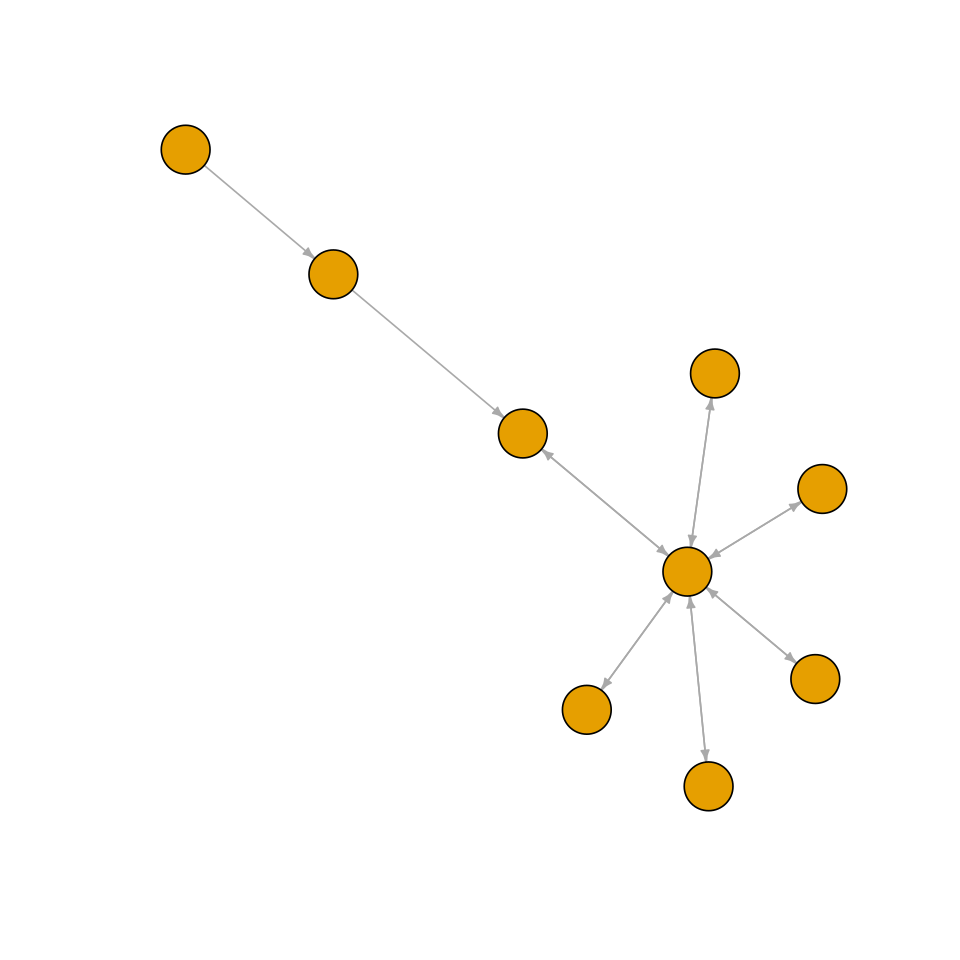

In [18]:
options(repr.plot.width = 8, repr.plot.height =8)

plot(mynet, edge.arrow.size=.4, vertex.label=NA)

### Measures

In [30]:
mean_distance(mynet, directed=F)

[1] 2.222222

In [31]:
# the ,maximum distane
diameter(mynet, directed=F,weights=NA)

[1] 4

In [32]:
centr_degree(mynet,mode="in",normalized=T)

$res
[1] 1 1 1 1 1 2 1 0 6

$centralization
[1] 0.5555556

$theoretical_max
[1] 72

In [23]:
edge_density(mynet,loops=F)

[1] 0.1944444

In [24]:
degree(mynet)

[1]  2  2  2  2  2  3  2  1 12

In [30]:
mean(degree(mynet))

[1] 3.111111

### Clusters

In [25]:
cliques(mynet)

Warning message in cliques(mynet):
“At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations”


[[1]]
+ 1/9 vertex, from c9c78c4:
[1] 9

[[2]]
+ 1/9 vertex, from c9c78c4:
[1] 4

[[3]]
+ 1/9 vertex, from c9c78c4:
[1] 8

[[4]]
+ 2/9 vertices, from c9c78c4:
[1] 4 8

[[5]]
+ 1/9 vertex, from c9c78c4:
[1] 7

[[6]]
+ 2/9 vertices, from c9c78c4:
[1] 7 9

[[7]]
+ 1/9 vertex, from c9c78c4:
[1] 6

[[8]]
+ 2/9 vertices, from c9c78c4:
[1] 4 6

[[9]]
+ 2/9 vertices, from c9c78c4:
[1] 6 9

[[10]]
+ 1/9 vertex, from c9c78c4:
[1] 5

[[11]]
+ 2/9 vertices, from c9c78c4:
[1] 5 9

[[12]]
+ 1/9 vertex, from c9c78c4:
[1] 3

[[13]]
+ 2/9 vertices, from c9c78c4:
[1] 3 9

[[14]]
+ 1/9 vertex, from c9c78c4:
[1] 2

[[15]]
+ 2/9 vertices, from c9c78c4:
[1] 2 9

[[16]]
+ 1/9 vertex, from c9c78c4:
[1] 1

[[17]]
+ 2/9 vertices, from c9c78c4:
[1] 1 9


In [26]:
#Here we dont have many cliques
sapply(cliques(mynet), length)

Warning message in cliques(mynet):
“At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations”


[1] 1 1 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2

In [27]:
largest_cliques(mynet)

Warning message in largest_cliques(mynet):
“At cliques.c:1087 :directionality of edges is ignored for directed graphs”


[[1]]
+ 2/9 vertices, from c9c78c4:
[1] 9 7

[[2]]
+ 2/9 vertices, from c9c78c4:
[1] 9 6

[[3]]
+ 2/9 vertices, from c9c78c4:
[1] 9 5

[[4]]
+ 2/9 vertices, from c9c78c4:
[1] 9 3

[[5]]
+ 2/9 vertices, from c9c78c4:
[1] 9 2

[[6]]
+ 2/9 vertices, from c9c78c4:
[1] 9 1

[[7]]
+ 2/9 vertices, from c9c78c4:
[1] 8 4

[[8]]
+ 2/9 vertices, from c9c78c4:
[1] 4 6


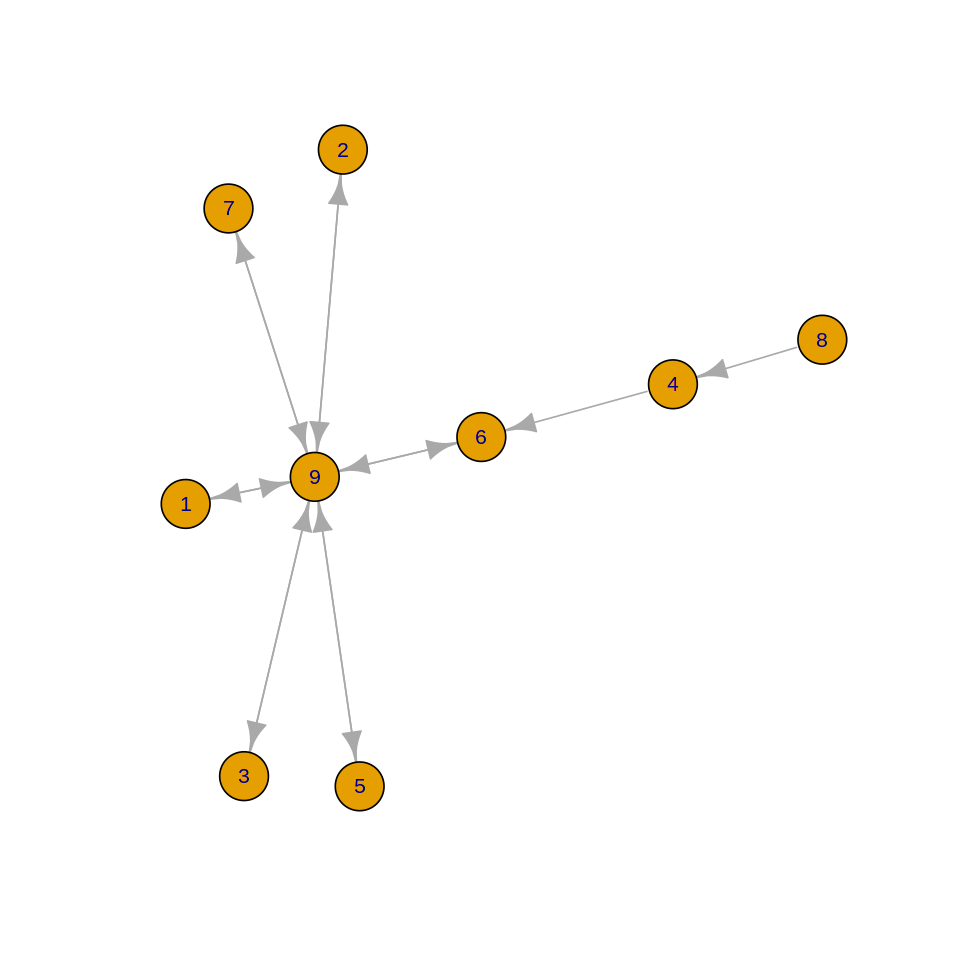

In [29]:
plot(as.directed(mynet))

### Hubs

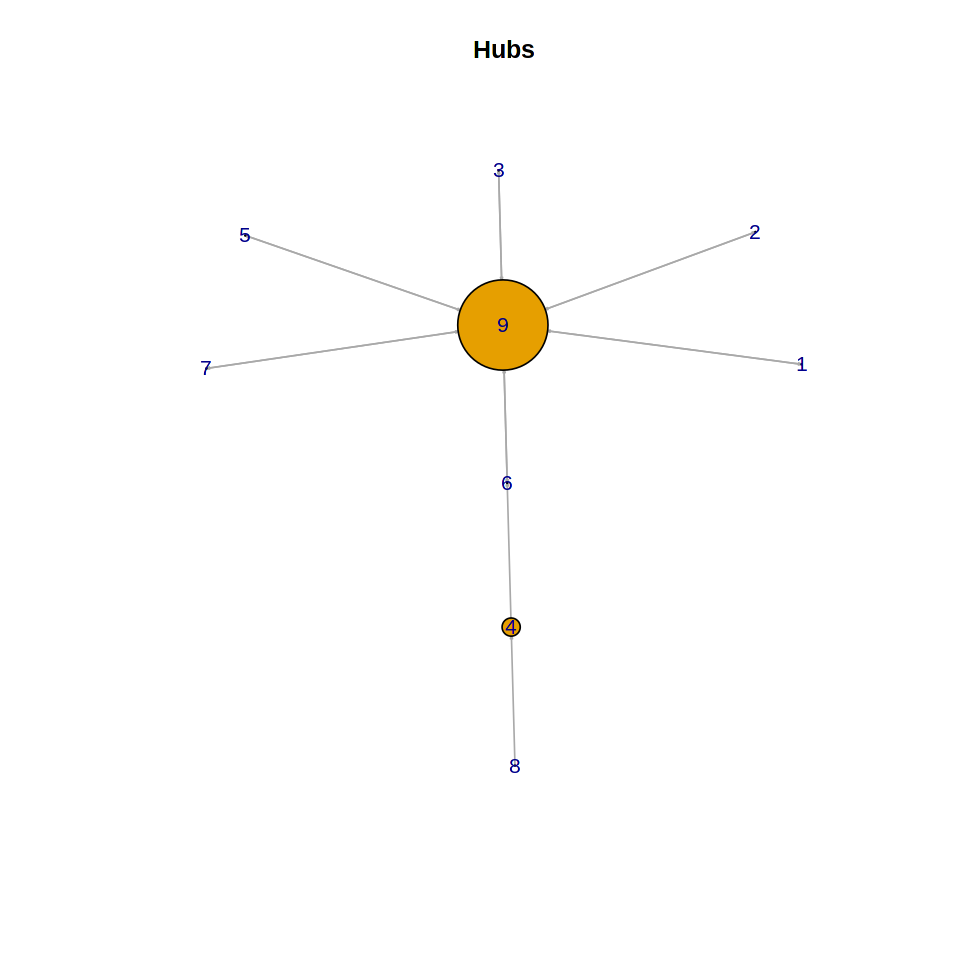

In [38]:
#The centeral, the node that have the more connections
set.seed(11)

hs <- hub_score(mynet)$vector
plot(mynet, vertex.size=hs * 30,main="Hubs",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Authority

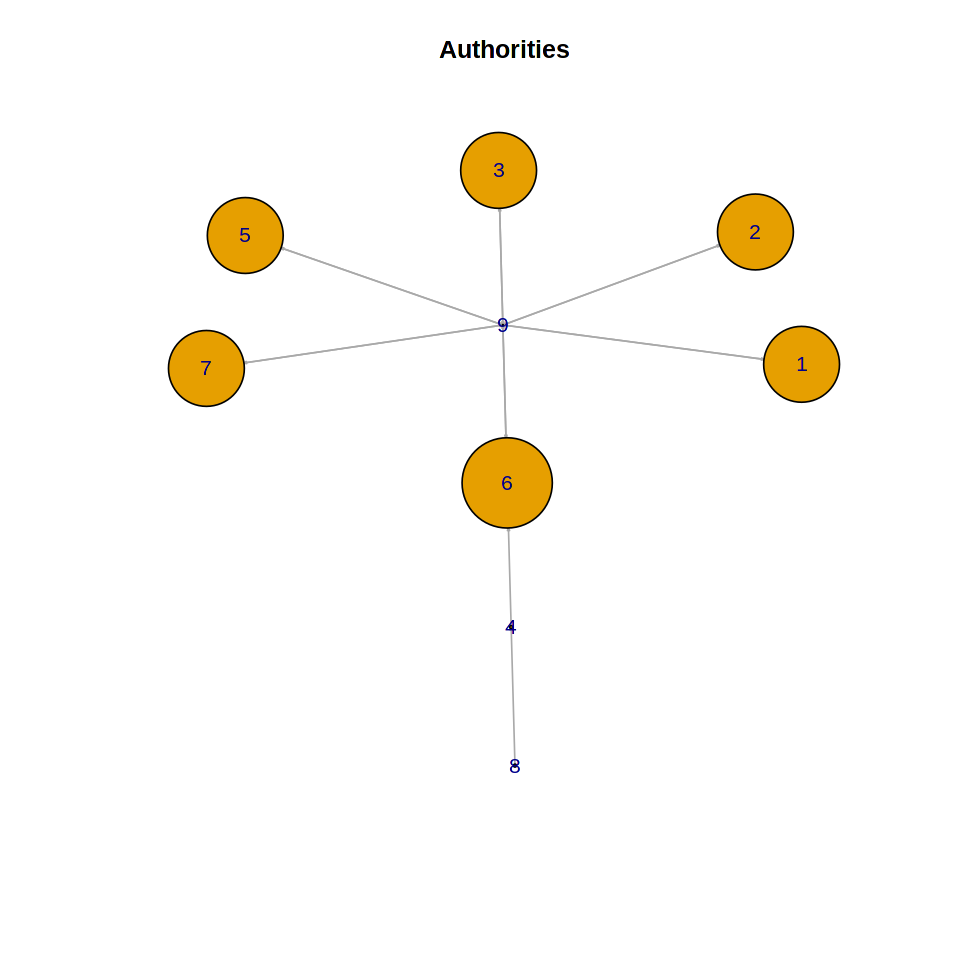

In [39]:
#the reference point, the node that conact places. gives the information for example of jornalist
set.seed(11)

au <- authority_score(mynet)$vector
plot(mynet, vertex.size=au * 30,main="Authorities",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Community

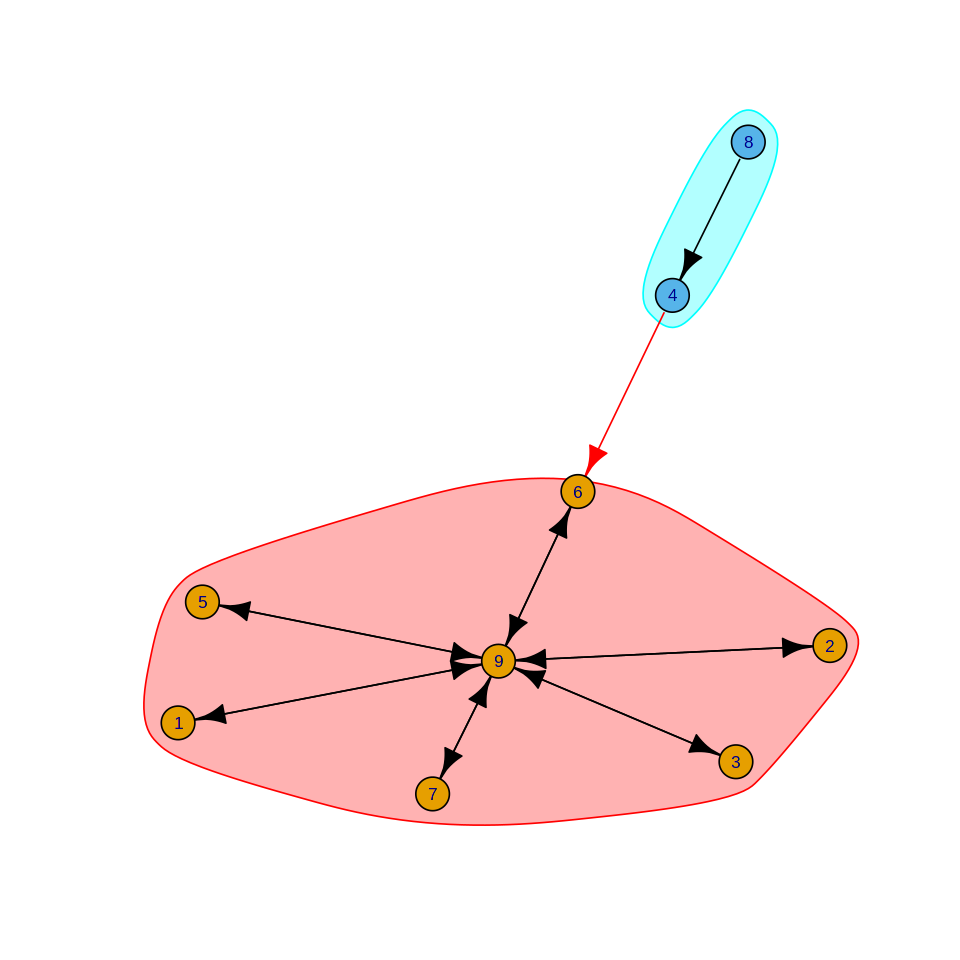

In [46]:
### community. looking for groups
cnet <- cluster_edge_betweenness(mynet)
plot(cnet, mynet, vertex.size=10, vertex.label.cex=0.8)

In [48]:
btwn <- cluster_edge_betweenness(mynet)
btwn

IGRAPH clustering edge betweenness, groups: 2, mod: 0.12
+ groups:
  $`1`
  [1] 1 2 3 5 6 7 9
  
  $`2`
  [1] 4 8
  

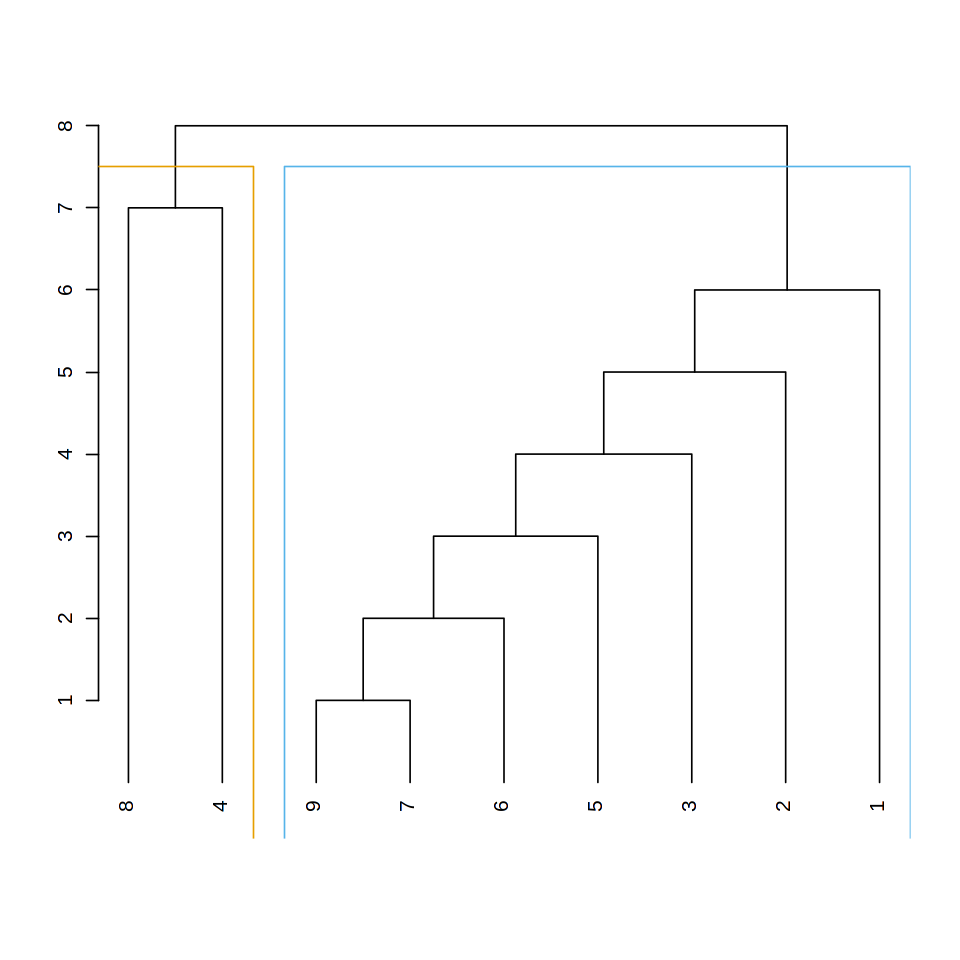

In [50]:
dendPlot(btwn, mode="hclust")

In [51]:
length(btwn)# it is 2 because we have only 2 groups

[1] 2

In [53]:
# this is what we need to our data base. this is the bottom line, and we add it to the database by joining
membership(btwn)

[1] 1 1 1 2 1 1 1 2 1